In [147]:
# function that starts a process with given cmdline args, reads from stdin,
# waits till execution finishes and returns the output
def run(cmdline):
    import subprocess
    p = subprocess.Popen(cmdline, stdout=subprocess.PIPE, stdin=subprocess.PIPE)
    return p.communicate()[0].decode()

In [148]:
num_points = 20

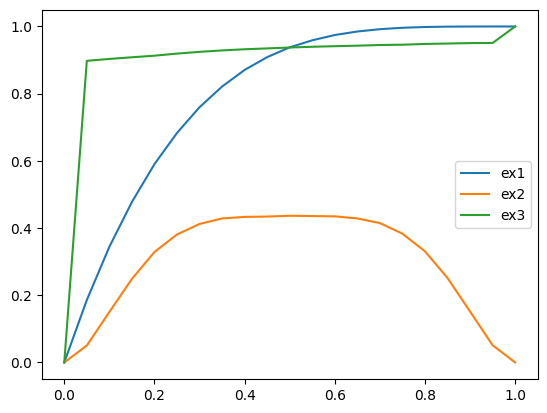

In [149]:
import matplotlib.pyplot as plt
import tempfile

file = "./pan-tadeusz-czyli-ostatni-zajazd-na-litwie.txt"
x_vals = [i/num_points for i in range(num_points + 1)]
y1_vals = []
y2_vals = []
y3_vals = []
for p in x_vals:
    with tempfile.NamedTemporaryFile() as tmp:
        run(["./szum", str(p), file, tmp.name])
        ex1 = run(["./sprawdz", file, tmp.name])
        y1_vals.append(float(ex1))

for p in x_vals:
    with tempfile.NamedTemporaryFile() as tmp:
        with tempfile.NamedTemporaryFile() as tmp2:
            run(["./koder", file, tmp.name])
            run(["./szum", str(p), tmp.name, tmp2.name])
            ex2 = run(["./dekoder", tmp2.name, tmp.name])
            y2_vals.append(float(ex2))

for p in x_vals:
    with tempfile.NamedTemporaryFile() as tmp:
        with tempfile.NamedTemporaryFile() as tmp2:
            with tempfile.NamedTemporaryFile() as tmp3:
                run(["./koder", file, tmp.name])
                run(["./szum", str(p), tmp.name, tmp2.name])
                run(["./dekoder", tmp2.name, tmp3.name])
                ex3 = run(["./sprawdz", file, tmp3.name])
                y3_vals.append(float(ex3))

plt.plot(x_vals, y1_vals, label="ex1")
plt.plot(x_vals, y2_vals, label="ex2")
plt.plot(x_vals, y3_vals, label="ex3")
plt.legend()
plt.show()